In [1]:
import os
os.chdir("..")

In [2]:
import multi_agent_reinforcement_learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wandb

In [3]:
price_1 = "kind_green_thesis/master2023/dw12qxvo"
price_2 = "kind_green_thesis/master2023/zr0o7qdb"
price_3 = "kind_green_thesis/master2023/71oa7i60"

In [4]:
api = wandb.Api()
run = api.run(price_3)
entries = []
for obs in run.scan_history():
    entries.append(obs)
df = pd.DataFrame(entries)

In [5]:
optimal_policy_idx = np.argmax(df["Best Reward"])

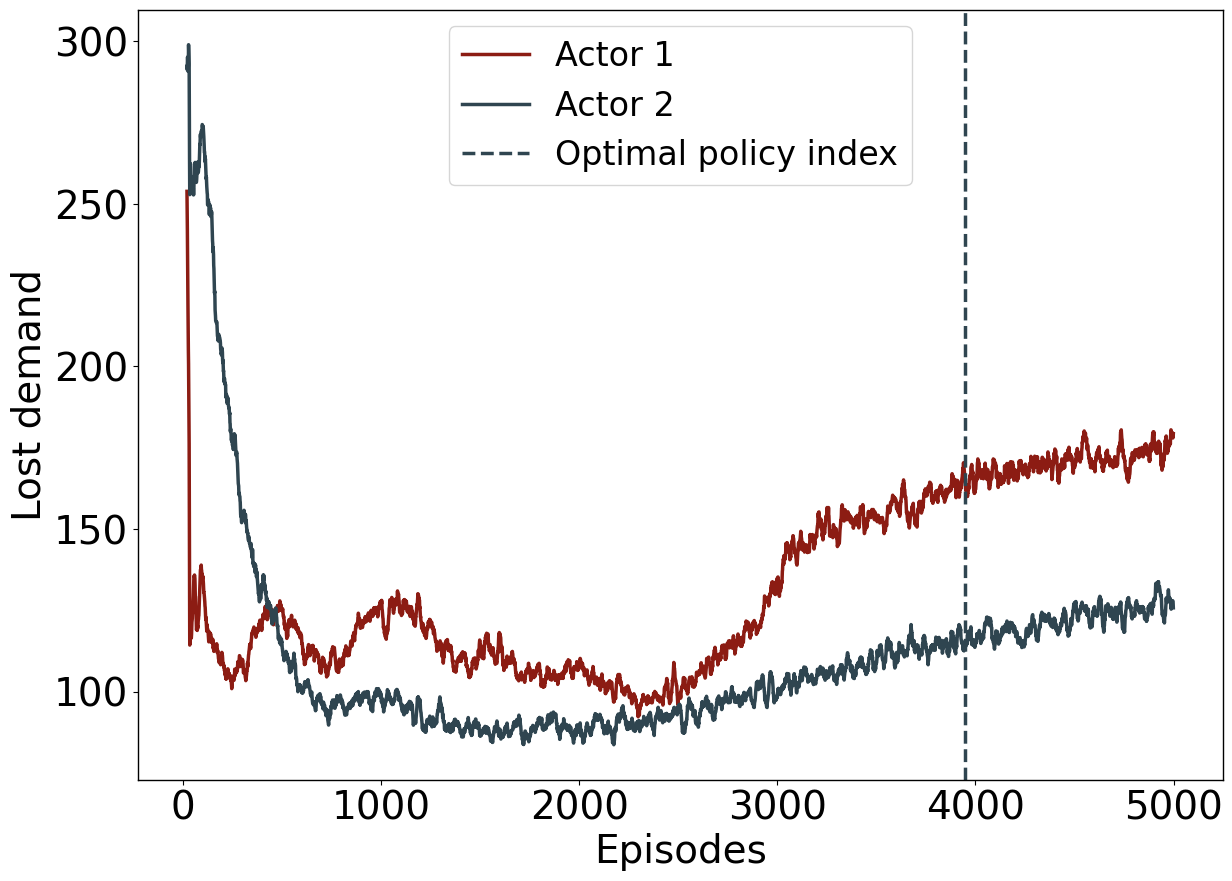

In [6]:
plt.plot(df["RL_1_SAC_bus_unmet_demand"].rolling(window=20).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_bus_unmet_demand"].rolling(window=20).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Lost demand")
plt.legend()
plt.savefig(f"figs/{run.name}_cancel_unmet_demand.png")
plt.show()

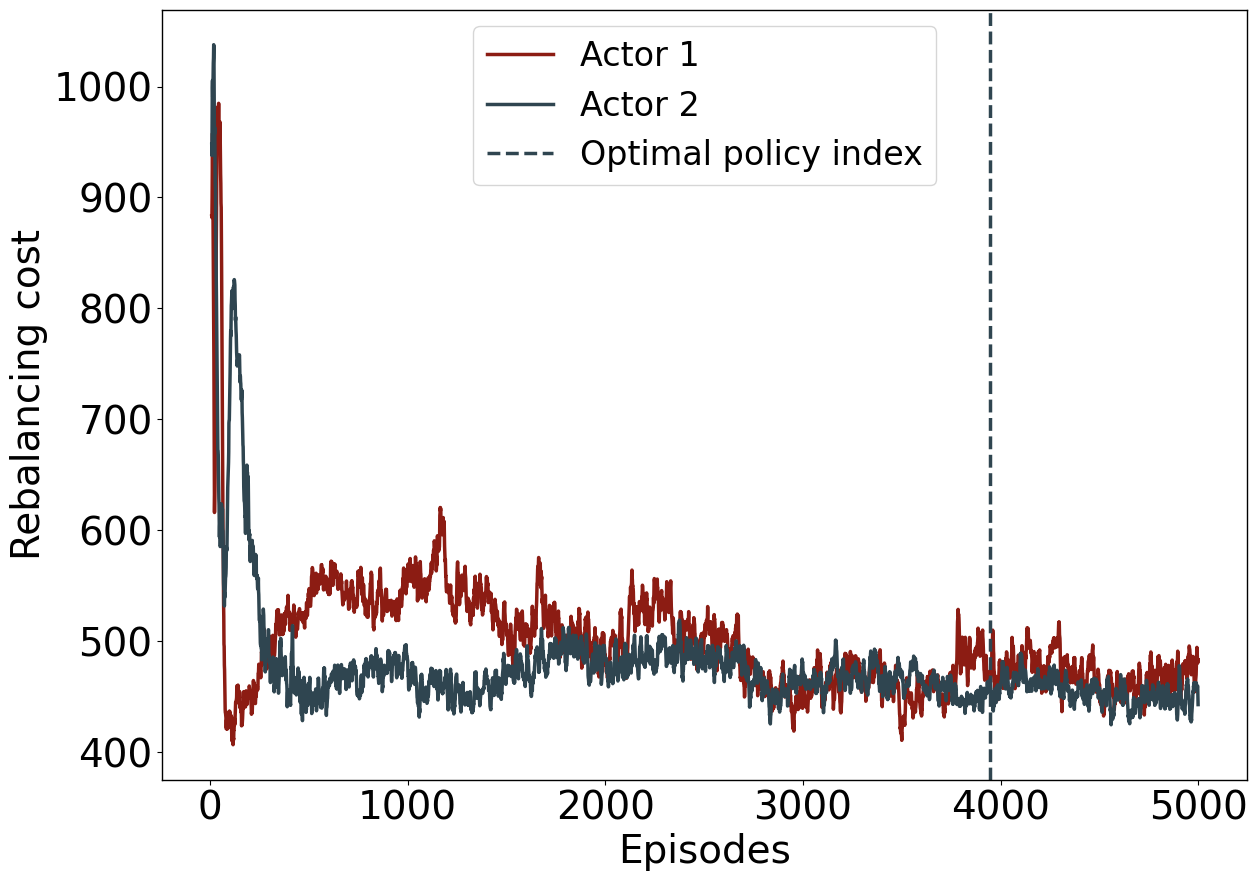

In [7]:
plt.plot(df["RL_1_SAC_rebalancing_cost"].rolling(window=10).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_rebalancing_cost"].rolling(window=10).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Rebalancing cost")
plt.legend()
plt.savefig(f"figs/{run.name}_rebalancing.png")
plt.show()

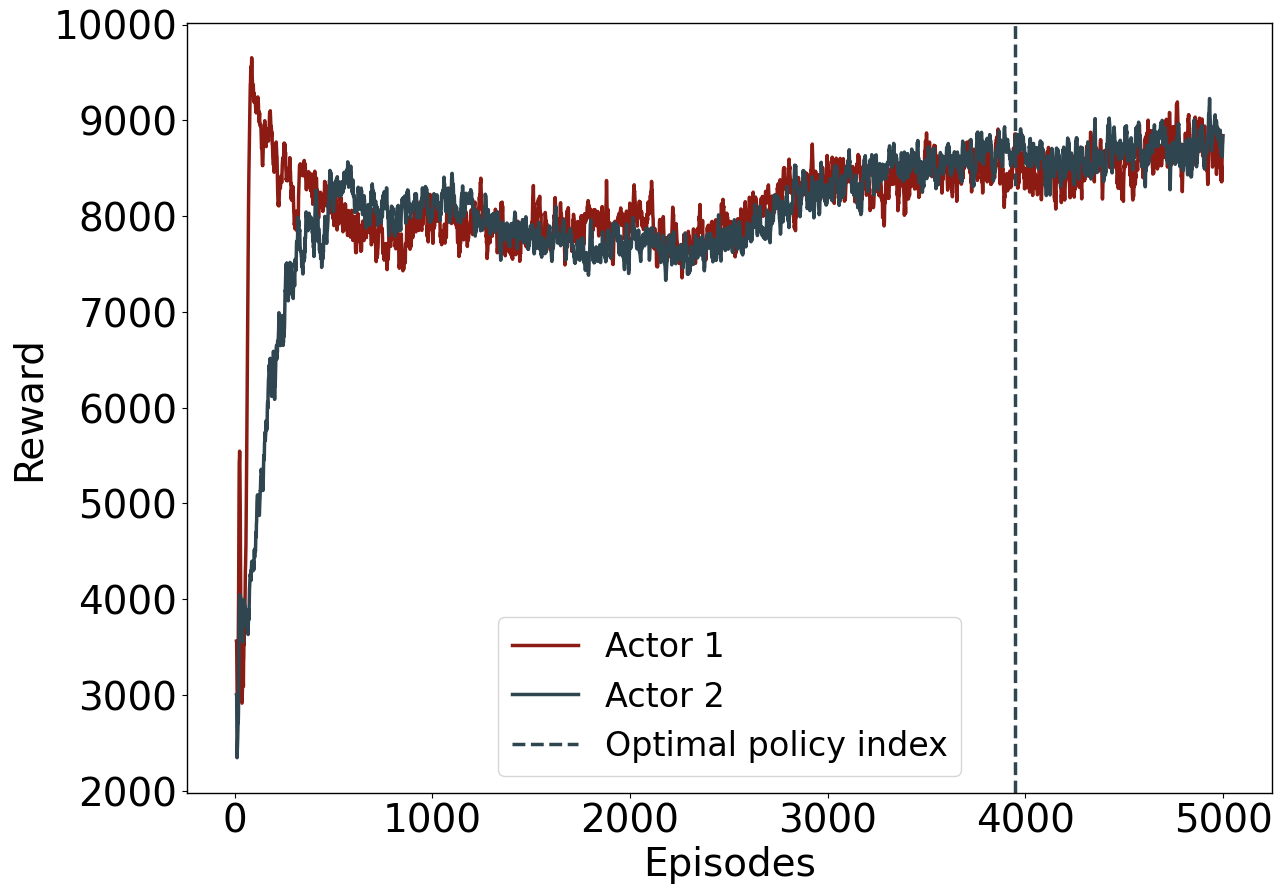

In [8]:
plt.plot(df["RL_1_SAC_reward"].rolling(window=10).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_reward"].rolling(window=10).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.savefig(f"figs/{run.name}_reward_per_actor.png")
plt.show()

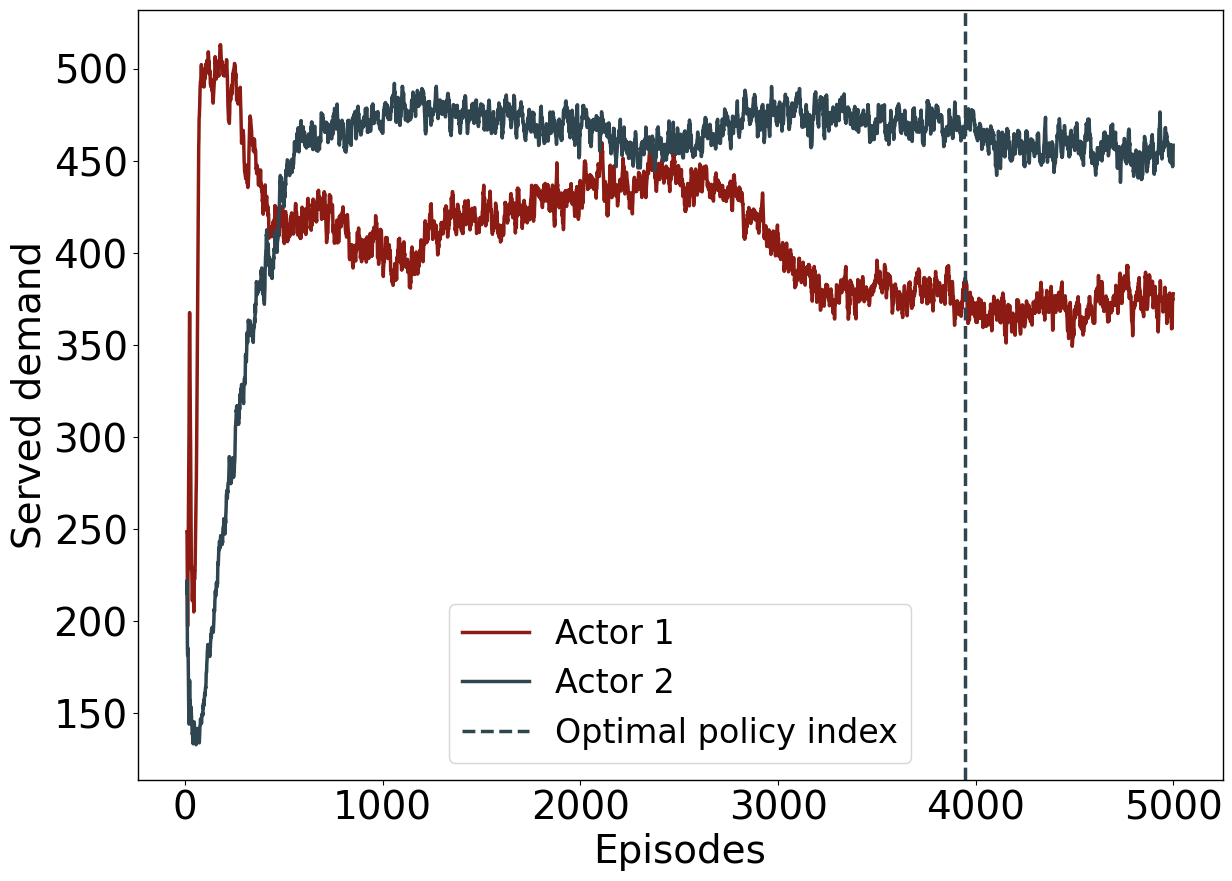

In [9]:
plt.plot(df["RL_1_SAC_served_demand"].rolling(window=10).mean(), label="Actor 1")
plt.plot(df["RL_2_SAC_served_demand"].rolling(window=10).mean(), label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Served demand")
plt.legend()
plt.savefig(f"figs/{run.name}_served_demand.png")
plt.show()

In [10]:
df.columns

Index(['RL_1_SAC_served_demand', 'RL_1_SAC_total_unmet_demand', 'Best Reward',
       'RL_2_SAC_rebalancing_cost', 'RL_2_SAC_bus_unmet_demand',
       'RL_1_SAC_reward', '_timestamp', 'RL_1_SAC_rebalancing_reward',
       'RL_2_SAC_rebalancing_reward', '_step', 'RL_2_SAC_served_demand',
       'RL_2_SAC_total_unmet_demand', '_runtime', 'RL_1_SAC_rebalancing_cost',
       'RL_2_SAC_reward', 'RL_2_SAC Mean Price', 'RL_1_SAC_bus_unmet_demand',
       'RL_1_SAC_overflow_unmet_demand', 'RL_2_SAC_overflow_unmet_demand',
       'RL_2_SAC_revenue_reward', 'RL_1_SAC Mean Price',
       'RL_1_SAC_revenue_reward'],
      dtype='object')

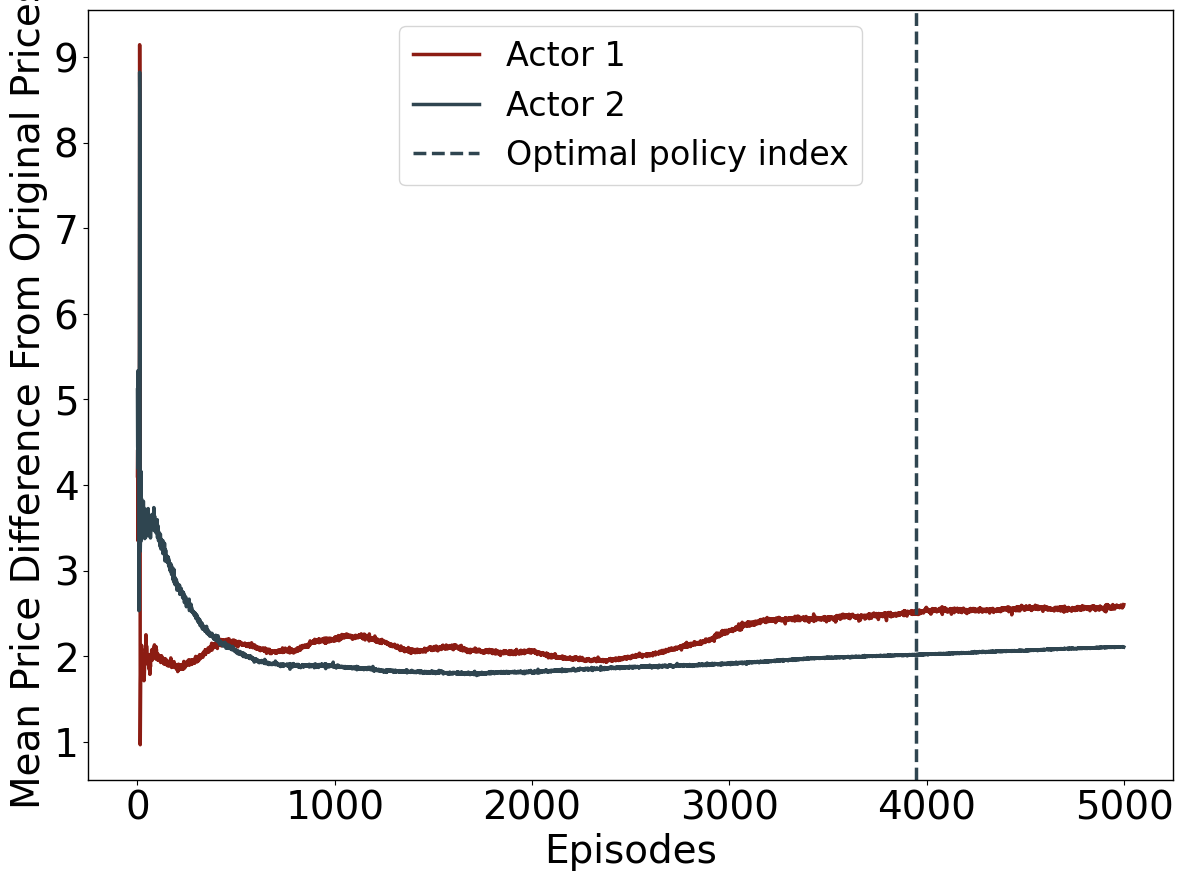

In [11]:
plt.plot(df["RL_1_SAC Mean Price"], label="Actor 1")
plt.plot(df["RL_2_SAC Mean Price"], label="Actor 2")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Mean Price Difference From Original Prices")
plt.legend()
plt.savefig(f"figs/{run.name}_model_prices.png")
plt.show()

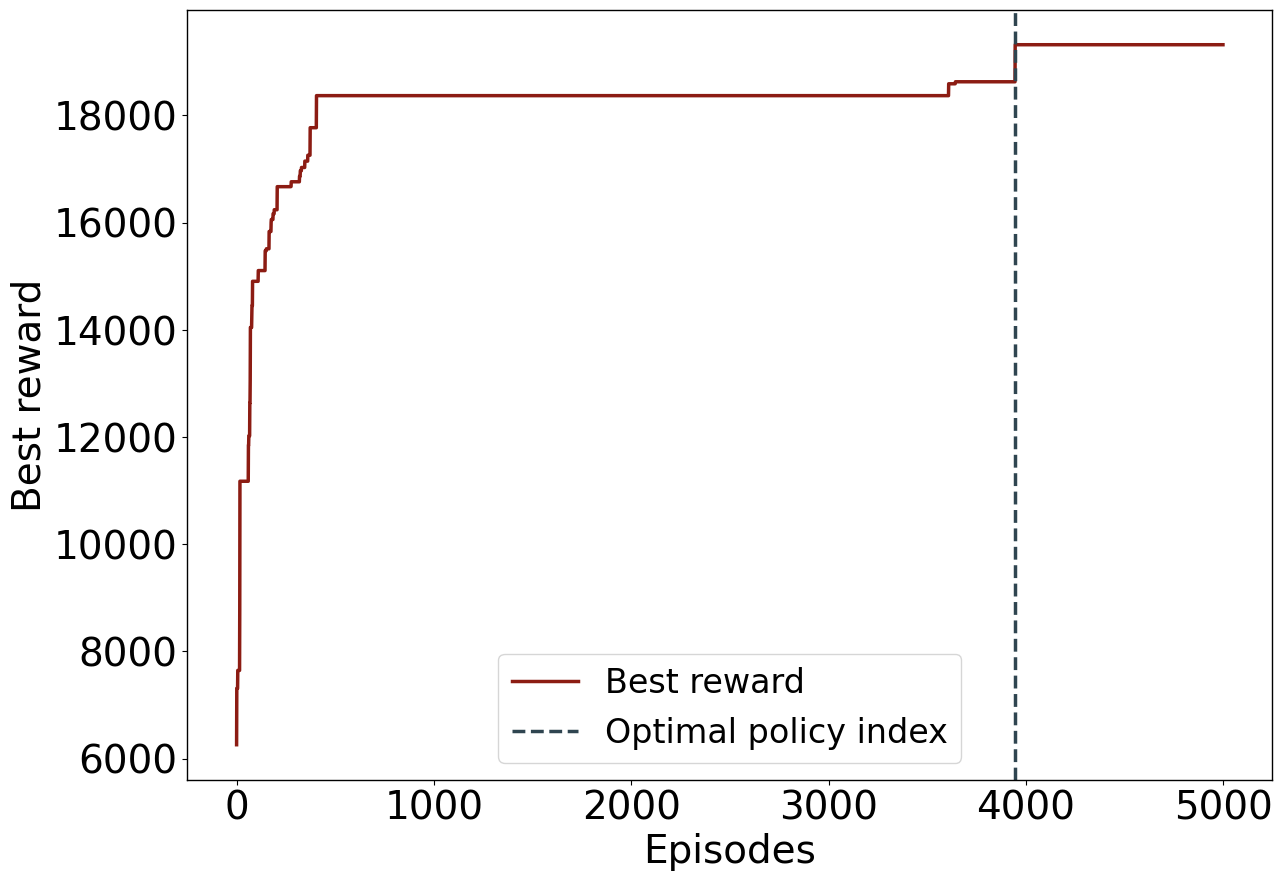

In [12]:
plt.plot(df["Best Reward"], label="Best reward")
plt.axvline(x=optimal_policy_idx, color="#2F4550", linestyle='--', label="Optimal policy index")
plt.xlabel("Episodes")
plt.ylabel("Best reward")
plt.legend()
plt.savefig(f"figs/{run.name}_best_reward.png")
plt.show()